# 📁 Read Compressed ZIP, TAR, or JSON Files Without Extracting Using Pandas  

❓ **Tired of extracting ZIP or TAR files just to analyze them?**  
🙃 **Pandas makes it easier:** you can read compressed files directly without extracting them.  

## 👉 **Solution**  
🟢 Use `pd.read_json("file.zip")` or `pd.read_csv("file.tar.gz")` and access the data instantly.  

## 🔧 **How does it work?**  
✅ Pandas allows reading compressed files directly from their location.  
✅ Works with ZIP, TAR, and JSON, reducing load times.  
✅ No more manual extraction or wasted disk space!  

## 🔎 **Why does it matter?**  
🚀 Speeds up ETL processes.  
💾 Saves memory and storage.  
📈 Facilitates handling large-scale datasets.  

## ✨ **Real-world example**  
📊 Imagine working with daily log files in a telecom company.  
Instead of extracting thousands of files, Pandas lets you read only what you need, saving resources.  

## ⚙️ **Business impact**  
✔️ Saves time in data processing.  
✔️ Reduces cloud storage costs.  
✔️ Optimizes data pipeline performance.  

## 📊 **Code summary**  
📌 We create a ZIP, TAR, and JSON file containing multiple datasets.  
📌 Use Pandas to read only the required files without extracting them.  
📌 Visualize the data in a chart for better insights.  

💭 **What other optimizations do you use for handling compressed data? Share in the comments!**  
## 🔗 **[GitHub](https://github.com/jcombari/AI-For-Unstructured-Data/blob/main/Text/20250206_ZIP%20o%20JSON.ipynb)**

 🔑 #Python #Pandas #DataScience #BigData #AI #MachineLearning #ETL #CloudComputing #DataAnalytics  

---

# 📁 Leer archivos ZIP, TAR o JSON comprimidos sin extraerlos con Pandas  

❓ **¿Cansado de extraer archivos ZIP o TAR solo para analizarlos?**  
🙃 **Pandas lo hace más fácil:** puedes leer archivos comprimidos directamente sin extraerlos.  

## 👉 **Solución**  
🟢 Usa `pd.read_json("archivo.zip")` o `pd.read_csv("archivo.tar.gz")` y accede a los datos sin pasos adicionales.  

## 🔧 **¿Cómo funciona?**  
✅ Pandas permite leer archivos comprimidos directamente desde su ubicación.  
✅ Funciona con ZIP, TAR y JSON, reduciendo tiempos de carga.  
✅ ¡No más descompresión manual ni pérdida de espacio en disco!  

## 🔎 **¿Por qué importa?**  
🚀 Agiliza los procesos de ETL.  
💾 Ahorra memoria y almacenamiento.  
📈 Facilita la manipulación de grandes volúmenes de datos.  

## ✨ **Ejemplo real**  
📊 Supongamos que trabajas con archivos de registros diarios en una empresa de telecomunicaciones.  
En lugar de descomprimir miles de archivos, Pandas permite leer solo los necesarios sin desperdiciar recursos.  

## ⚙️ **Impacto en el negocio**  
✔️ Ahorro de tiempo en procesamiento de datos.  
✔️ Reducción de costos de almacenamiento en la nube.  
✔️ Optimización del rendimiento de los flujos de datos.  

## 📊 **Resumen del código**  
📌 Creamos un archivo ZIP, TAR y JSON comprimido con múltiples archivos de datos.  
📌 Usamos Pandas para leer solo los archivos que necesitamos sin extraerlos.  
📌 Visualizamos los datos en un gráfico para entender mejor la información.  

💭 **¿Qué otras optimizaciones usas para manejar datos comprimidos? Cuéntamelo en los comentarios.**  

## 🔗 **[GitHub](https://github.com/jcombari/AI-For-Unstructured-Data/blob/main/Text/20250206_ZIP%20o%20JSON.ipynb)**

 🔑 #Python #Pandas #DataScience #BigData #AI #MachineLearning #ETL #CloudComputing #DataAnalytics  



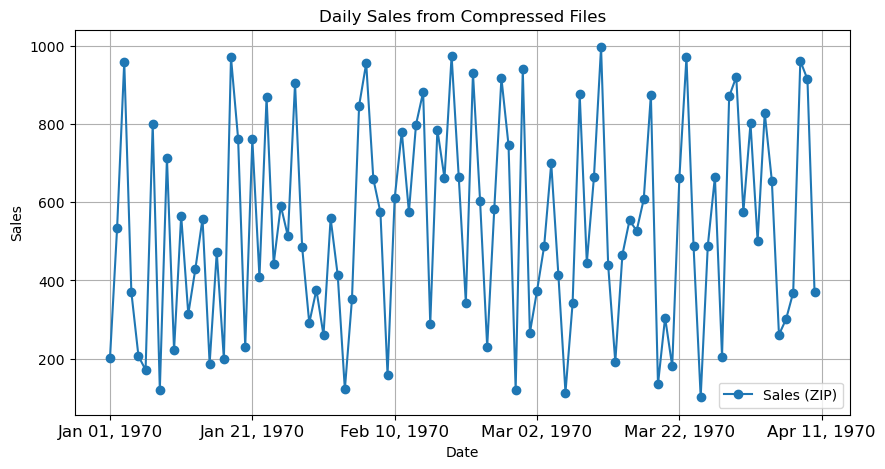

In [10]:
import pandas as pd
import numpy as np
import tarfile
import zipfile
import json
import os
import io
import matplotlib.pyplot as plt
import warnings  # Importing the warnings module

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')

# 📌 Simulating data in a DataFrame
np.random.seed(42)
data = pd.DataFrame({
    "Date": pd.date_range(start="2023-01-01", periods=100, freq="D"),
    "Sales": np.random.randint(100, 1000, size=100),
    "Category": np.random.choice(["A", "B", "C"], size=100)
})

# 📌 Save the DataFrame as a CSV file in memory
csv_buffer = io.StringIO()
data.to_csv(csv_buffer, index=False)
csv_content = csv_buffer.getvalue().encode()

# 📌 Save the DataFrame as a JSON file in memory
json_buffer = io.StringIO()
data.to_json(json_buffer, orient="records", lines=True)
json_content = json_buffer.getvalue().encode()

# 📌 Create a ZIP file containing the CSV and JSON files
zip_filename = "data.zip"
with zipfile.ZipFile(zip_filename, "w") as zf:
    zf.writestr("data.csv", csv_content)
    zf.writestr("data.json", json_content)

# 📌 Create a TAR file containing the CSV and JSON files
tar_filename = "data.tar.gz"
with tarfile.open(tar_filename, "w:gz") as tf:
    csv_io = io.BytesIO(csv_content)
    json_io = io.BytesIO(json_content)

    csv_info = tarfile.TarInfo(name="data.csv")
    csv_info.size = len(csv_content)
    tf.addfile(csv_info, csv_io)

    json_info = tarfile.TarInfo(name="data.json")
    json_info.size = len(json_content)
    tf.addfile(json_info, json_io)

# 📌 Read the ZIP file directly without extracting
with zipfile.ZipFile(zip_filename, "r") as zf:
    with zf.open("data.csv") as file:
        df_zip = pd.read_csv(file)

# 📌 Read the TAR file directly without extracting
with tarfile.open(tar_filename, "r:gz") as tf:
    file = tf.extractfile("data.csv")
    df_tar = pd.read_csv(file)

# 📌 Read the compressed JSON file in ZIP directly
with zipfile.ZipFile(zip_filename, "r") as zf:
    with zf.open("data.json") as file:
        df_json = pd.read_json(file, lines=True)

# 📊 Visualization of data loaded from compressed files
plt.figure(figsize=(10, 5))
plt.plot(df_zip["Date"], df_zip["Sales"], marker="o", linestyle="-", label="Sales (ZIP)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Daily Sales from Compressed Files")

# Adjusting date labels to make them more readable
plt.xticks(rotation=0)  # Set rotation to 0 (no rotation)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %d, %Y'))  # Format the dates (e.g., Jan 01, 2023)
plt.gca().tick_params(axis='x', which='major', labelsize=12)  # Adjust the size of the labels
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))  # Show only 6 date labels on the x-axis to avoid clutter

plt.legend()
plt.grid(True)
plt.show()
